## Load the dataset

In [ ]:
#import pandas library
import pandas as pd

#import numpy library
import numpy as np

#import datetime library
from datetime import datetime

#import matplotlib.pyplot library
import matplotlib.pyplot as plt

#read csv file as a data frame
wind_df = pd.read_csv('WindGeneration.csv', parse_dates=['Date'])

#converting 'Time' column values from 1-24 to 0-23  
wind_df['Time'] = wind_df['Time']-1

#converting 'Time' column to hours format
wind_df['Time'] = wind_df['Time'].astype(str)+':00'

#combining 'Time' and 'Date' to create timestamps
wind_df['Timestamp'] = wind_df['Date'].astype(str) + ' ' + wind_df['Time']

#liner interpolation to fill missing values
#reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html
wind_df.interpolate(method='pad', axis=0, inplace=True)

#see information about the dataframe
wind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             8760 non-null   datetime64[ns]
 1   Time             8760 non-null   object        
 2   Wind Generation  8760 non-null   float64       
 3   Timestamp        8760 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 273.9+ KB


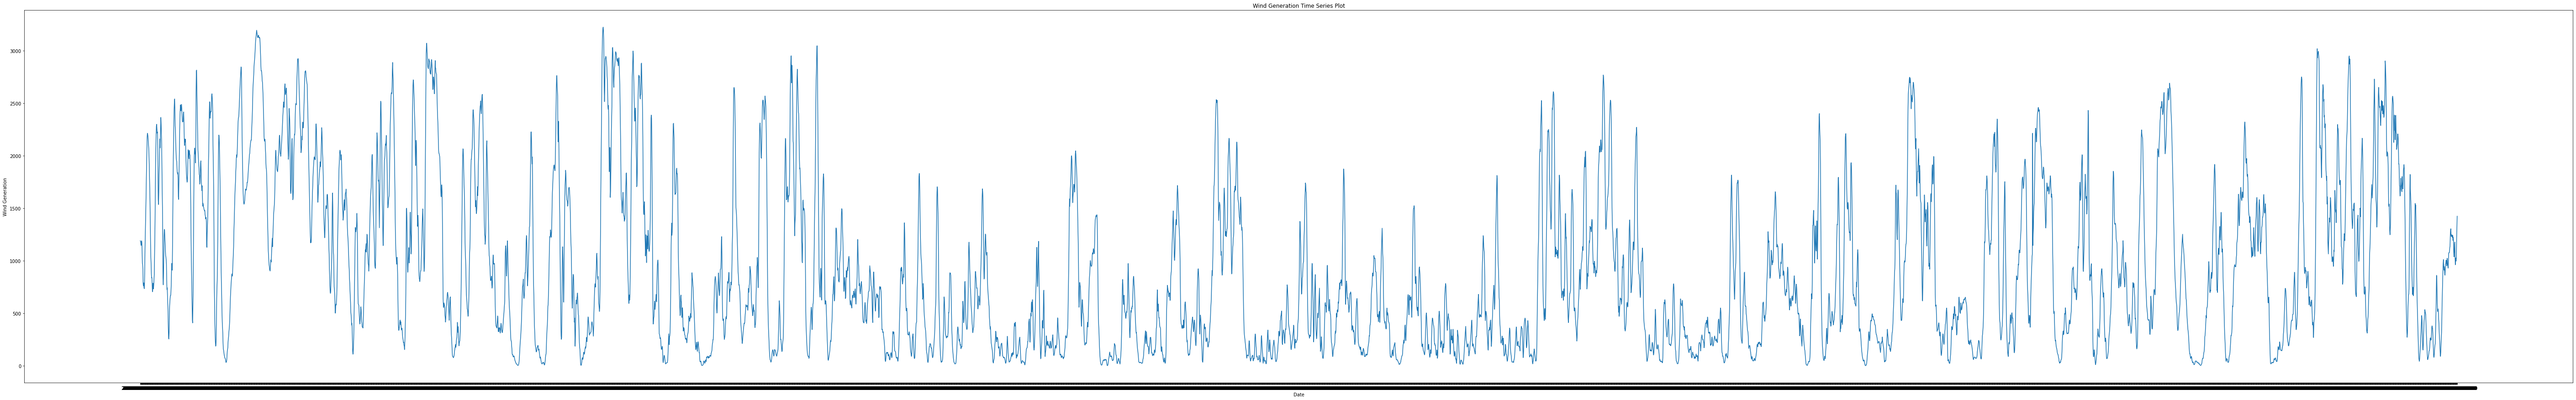

In [ ]:

#change size of the time series graph
#reference: https://stackabuse.com/change-figure-size-in-matplotlib/
plt.figure(figsize=(100, 15))

#set the name of x-axis
plt.xlabel("Date")

#set the name of y-axis
plt.ylabel("Wind Generation")

#set graph title
plt.title("Wind Generation Time Series Plot")

#plotting the time series graph
plt.plot(wind_df['Timestamp'], wind_df['Wind Generation'])


## Change in wind generation over time

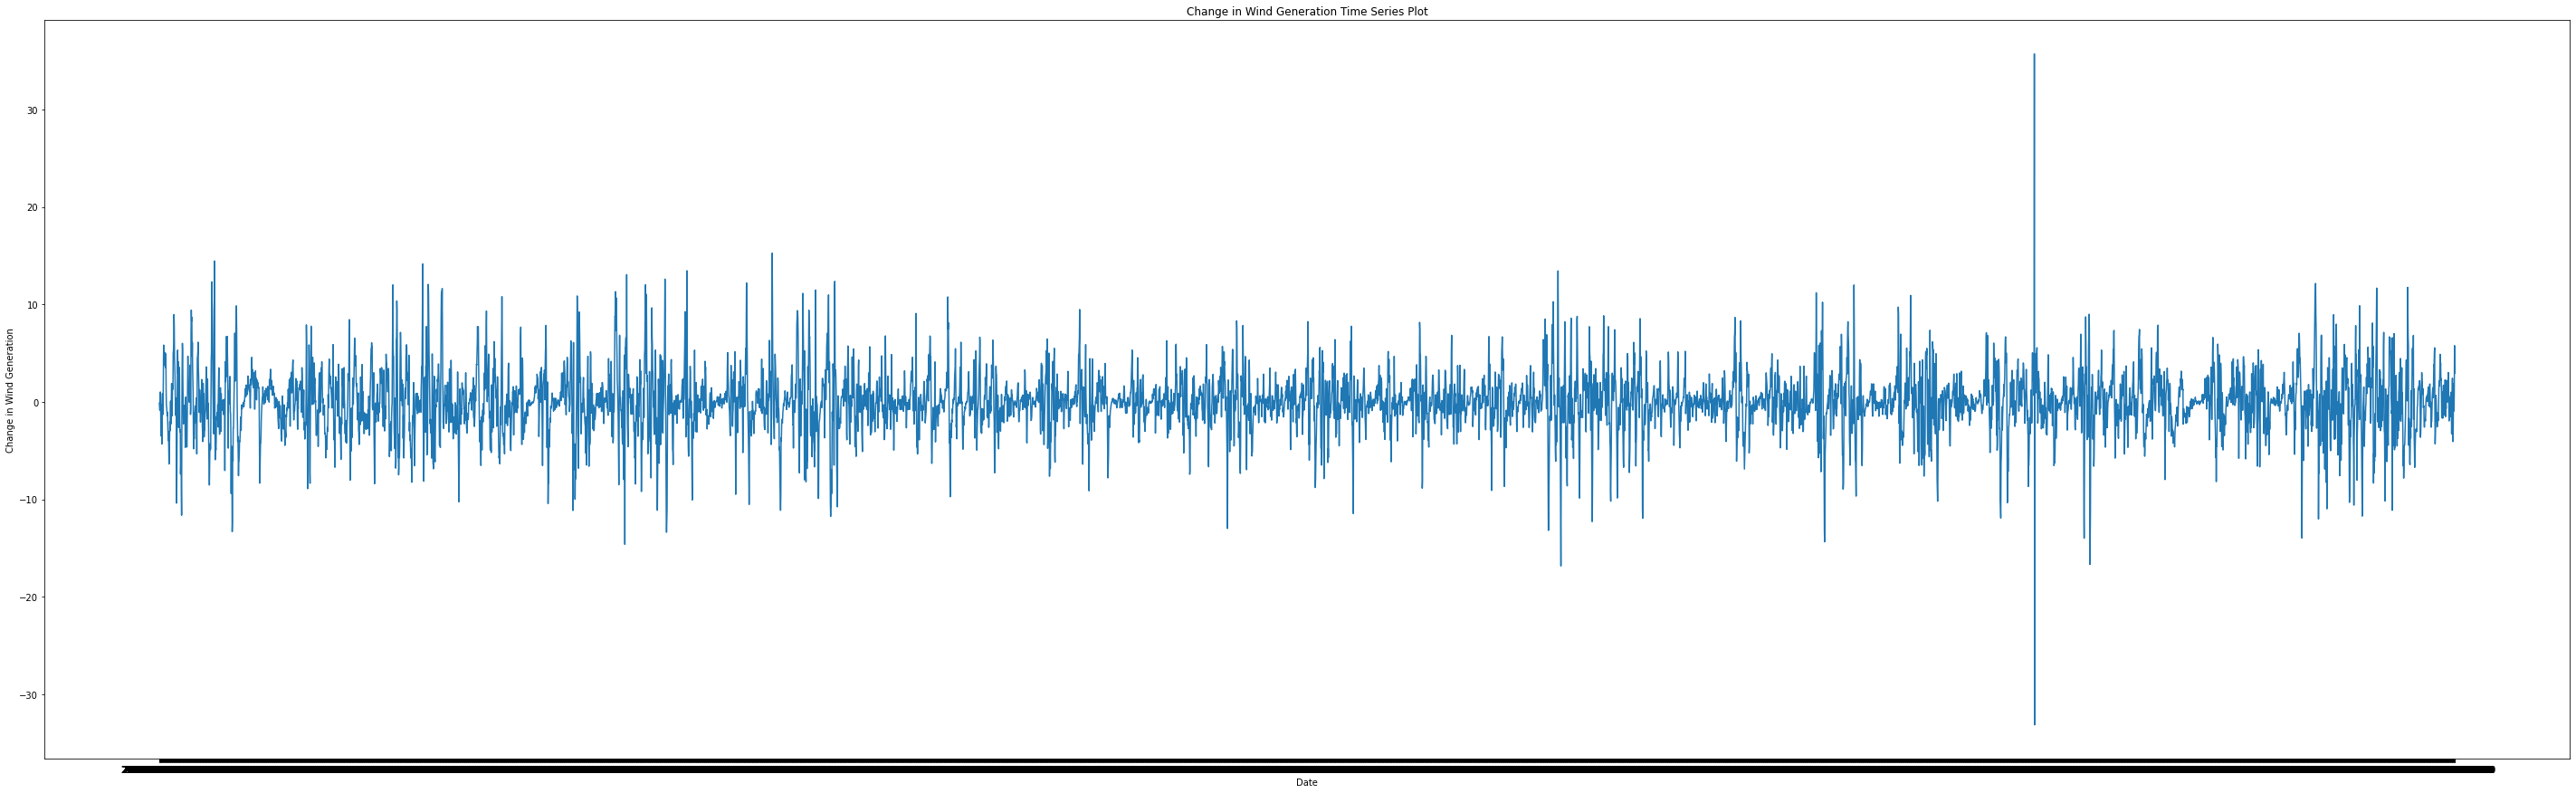

In [ ]:
#finding the max wind generation value
max_generation = wind_df['Wind Generation'].max()

#finding the change in wind generation as a percentage of max wind generation  
wind_df['percentage of max'] = (wind_df['Wind Generation'].diff())/max_generation * 100

#changing the figure size
plt.figure(figsize=(50, 15))

#set the name of x-axis
plt.xlabel("Date")

#set the name of y-axis
plt.ylabel("Change in Wind Generation")

#set graph title
plt.title("Change in Wind Generation Time Series Plot")

#plotting the time series graph
plt.plot(wind_df['Timestamp'], wind_df['percentage of max'])


## CDF of positive and negative ramps

In [ ]:
#assigning the calculated ramps to a list
ramps = wind_df['percentage of max']

#creating an empty list for negative ramps 
neg_ramps = []

#creating an empty list for positive ramps
pos_ramps = []

#start for loop
for i in range(8760):
  
  #if ramp values are negative
  if ramps[i] < 0:

    #append the value to the negative ramp list
    neg_ramps.append(ramps[i])

#start for loop
for i in range(8760):
  
  #if ramp values are positive
  if ramps[i] >= 0:

    #append the value to the positive ramp list
    pos_ramps.append(ramps[i])

#sort the positive ramps 
pos_ramps.sort()

#calculate the absolute values of the negative ramps
neg_ramps_abs =  [abs(i) for i in neg_ramps]

#sort the negative ramps 
neg_ramps_abs.sort()

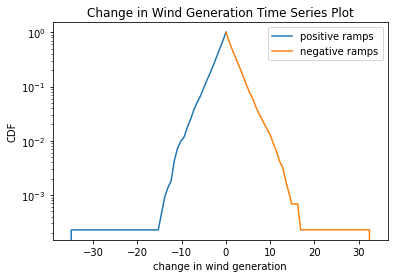

In [ ]:
#import the statsmodel library
import statsmodels.api as sm # recommended import according to the docs

#create the ecdf class
#reference: https://stackoverflow.com/questions/3209362/how-to-plot-empirical-cdf-ecdf
ecdf = sm.distributions.ECDF(pos_ramps)

#create x-axis
x = np.linspace(min(pos_ramps), max(pos_ramps))

#calculate the ecdf of the percentage change
y = ecdf(x)

#plot the semilogy graph
#reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogy.html
plt.semilogy(-x, 1-y, )

#create the ecdf class
ecdf = sm.distributions.ECDF(neg_ramps_abs)

#create x-axis
x = np.linspace(min(neg_ramps_abs), max(neg_ramps_abs))

#calculate the ecdf of the percentage change
y = ecdf(x)

#plot the semilogy graph
plt.semilogy(x, 1-y)

#set the name of x-axis
plt.xlabel("change in wind generation")

#set the name of y-axis
plt.ylabel("CDF")

#set graph title
plt.title("Change in Wind Generation Time Series Plot")

#plot the legend
plt.legend(labels=['positive ramps', 'negative ramps'])

## Variability of wind generation over different time scales

In [ ]:
#calculate the percentage change of max generation
ramps_1 = ((wind_df['Wind Generation'].diff(periods=1))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_2 = ((wind_df['Wind Generation'].diff(periods=2))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_3 = ((wind_df['Wind Generation'].diff(periods=3))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_4 = ((wind_df['Wind Generation'].diff(periods=4))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_5 = ((wind_df['Wind Generation'].diff(periods=5))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_6 = ((wind_df['Wind Generation'].diff(periods=6))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_7 = ((wind_df['Wind Generation'].diff(periods=7))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_8 = ((wind_df['Wind Generation'].diff(periods=8))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_9 = ((wind_df['Wind Generation'].diff(periods=9))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_10 = ((wind_df['Wind Generation'].diff(periods=10))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_11 = ((wind_df['Wind Generation'].diff(periods=11))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_12 = ((wind_df['Wind Generation'].diff(periods=12))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_13 = ((wind_df['Wind Generation'].diff(periods=13))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_14 = ((wind_df['Wind Generation'].diff(periods=14))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_15 = ((wind_df['Wind Generation'].diff(periods=15))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_16 = ((wind_df['Wind Generation'].diff(periods=16))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_17 = ((wind_df['Wind Generation'].diff(periods=17))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_18 = ((wind_df['Wind Generation'].diff(periods=18))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_19 = ((wind_df['Wind Generation'].diff(periods=19))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_20 = ((wind_df['Wind Generation'].diff(periods=20))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_21 = ((wind_df['Wind Generation'].diff(periods=21))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_22 = ((wind_df['Wind Generation'].diff(periods=22))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_23 = ((wind_df['Wind Generation'].diff(periods=23))/max_generation * 100).fillna(0)

#calculate the percentage change of max generation
ramps_24 = ((wind_df['Wind Generation'].diff(periods=24))/max_generation * 100).fillna(0)

#create a list of previously created lists
name_list = [ramps_1, ramps_2, ramps_3, ramps_4, ramps_5, ramps_6, ramps_7, ramps_8, ramps_9, ramps_10, ramps_11, 
             ramps_12, ramps_13, ramps_14, ramps_15, ramps_16, ramps_17, ramps_18, ramps_19, ramps_20, 
             ramps_21, ramps_22, ramps_23, ramps_24]

#create an empty list
percentile_1 = []

#create an empty list
percentile_5 = []

#create an empty list
percentile_95 = []

#create an empty list
percentile_99 = []

#calculate percentiles for all 24 hour lists
for i in range(24):
  percentile_1.append(np.percentile(name_list[i], 1))

#calculate percentiles for all 24 hour lists
for i in range(24):
  percentile_5.append(np.percentile(name_list[i], 5))

#calculate percentiles for all 24 hour lists
for i in range(24):
  percentile_95.append(np.percentile(name_list[i], 95))

#calculate percentiles for all 24 hour lists
for i in range(24):
  percentile_99.append(np.percentile(name_list[i], 99))


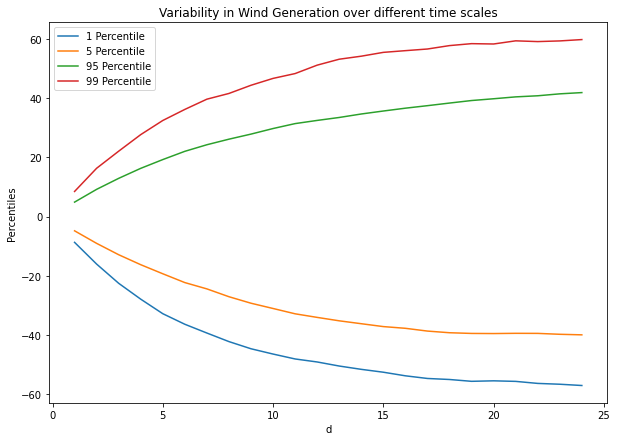

In [ ]:
#create 24 points for each hour
x = np.linspace(1, 24, num=24)

#change the size of the graph
plt.figure(figsize=(10, 7))

#set the name of x-axis
plt.xlabel("d")

#set the name of y-axis
plt.ylabel("Percentiles")

#set graph title
plt.title("Variability in Wind Generation over different time scales")

#plot the 1 percentile graph
plt.plot(x, percentile_1)

#plot the 5 percentile graph
plt.plot(x, percentile_5)

#plot the 95 percentile graph
plt.plot(x, percentile_95)

#plot the 99 percentile graph
plt.plot(x, percentile_99)

#create a legend for the graph
#reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(labels=['1 Percentile', '5 Percentile', '95 Percentile', '99 Percentile'])

## Autocorrelation plot of wind generation


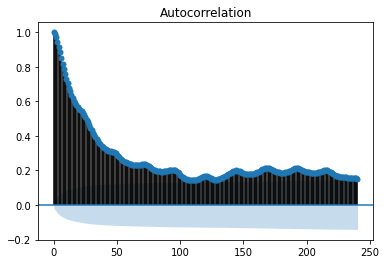

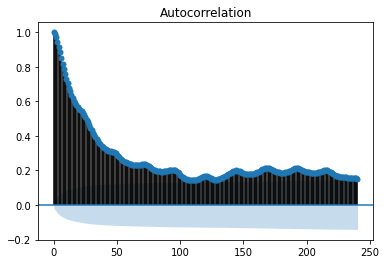

In [ ]:
#import the plot_acf function from statsmodel
#https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html
from statsmodels.graphics.tsaplots import plot_acf

#plot the autocorrelation graph with lags = 240
plot_acf(wind_df['Wind Generation'], lags = 240)

## Autocorrelation plot of change in wind generation

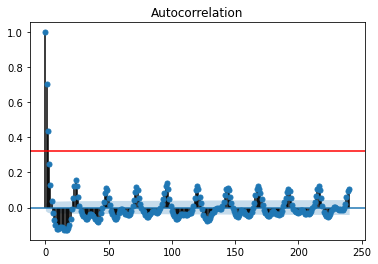

In [ ]:
#plot the autocorrelation graph with lags = 240
plot_acf(wind_df['percentage of max'].fillna(0), lags = 240)

#plot the horizontal line
#reference: https://stackoverflow.com/questions/38503381/set-number-of-lags-in-python-pandas-autocorrelation-plot
plt.axhline(y=1.96/np.sqrt(8760/240), color='red')

## Variance Ratio test and AdFuller test

In [ ]:
#install the arch library
%pip install arch

In [ ]:
#import the arch library
from arch.unitroot import VarianceRatio

# call the VarianceRatio function with lags 0f 10 days
#https://arch.readthedocs.io/en/latest/unitroot/generated/arch.unitroot.VarianceRatio.html
vr = VarianceRatio(wind_df['Wind Generation'], lags=240)

#print out the ratio value
print('The ratio value is', vr.vr)

##print out the summary of the variance ratio test
vr.summary()


The ratio value is 0.4488603729358055


Test Statistic,-2.558
P-value,0.011
Lags,240


In [ ]:
#import the adfuller library
from statsmodels.tsa.stattools import adfuller

#perform the test
test_result=adfuller(wind_df['Wind Generation'])

#print test results
print(test_result)

(-9.507515416178897, 3.3166039921381385e-16, 26, 8733, {'1%': -3.4310990236088363, '5%': -2.8618710185907106, '10%': -2.566946196227356}, 98212.41091601133)


## Moving average

In [ ]:
#calculate the moving average 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
sma_1 = wind_df['Wind Generation'].rolling(1).mean().fillna(0)
#calculate the moving average 
sma_2 = wind_df['Wind Generation'].rolling(2).mean().fillna(0)
#calculate the moving average 
sma_3 = wind_df['Wind Generation'].rolling(3).mean().fillna(0)
#calculate the moving average 
sma_4 = wind_df['Wind Generation'].rolling(4).mean().fillna(0)
#calculate the moving average 
sma_5 = wind_df['Wind Generation'].rolling(5).mean().fillna(0)
#calculate the moving average 
sma_6 = wind_df['Wind Generation'].rolling(6).mean().fillna(0)
#calculate the moving average 
sma_7 = wind_df['Wind Generation'].rolling(7).mean().fillna(0)
#calculate the moving average 
sma_8 = wind_df['Wind Generation'].rolling(8).mean().fillna(0)
#calculate the moving average 
sma_9 = wind_df['Wind Generation'].rolling(9).mean().fillna(0)
#calculate the moving average 
sma_10 = wind_df['Wind Generation'].rolling(10).mean().fillna(0)
#calculate the moving average 
sma_11 = wind_df['Wind Generation'].rolling(11).mean().fillna(0)
#calculate the moving average 
sma_12 = wind_df['Wind Generation'].rolling(12).mean().fillna(0)
#calculate the moving average 
sma_13 = wind_df['Wind Generation'].rolling(13).mean().fillna(0)
#calculate the moving average 
sma_14 = wind_df['Wind Generation'].rolling(14).mean().fillna(0)
#calculate the moving average 
sma_15 = wind_df['Wind Generation'].rolling(15).mean().fillna(0)
#calculate the moving average 
sma_16 = wind_df['Wind Generation'].rolling(16).mean().fillna(0)
#calculate the moving average 
sma_17 = wind_df['Wind Generation'].rolling(17).mean().fillna(0)
#calculate the moving average 
sma_18 = wind_df['Wind Generation'].rolling(18).mean().fillna(0)
#calculate the moving average 
sma_19 = wind_df['Wind Generation'].rolling(19).mean().fillna(0)
#calculate the moving average 
sma_20 = wind_df['Wind Generation'].rolling(20).mean().fillna(0)
#calculate the moving average 
sma_21 = wind_df['Wind Generation'].rolling(21).mean().fillna(0)
#calculate the moving average 
sma_22 = wind_df['Wind Generation'].rolling(22).mean().fillna(0)
#calculate the moving average 
sma_23 = wind_df['Wind Generation'].rolling(23).mean().fillna(0)
#calculate the moving average 
sma_24 = wind_df['Wind Generation'].rolling(24).mean().fillna(0)

In [ ]:
#import the MAE function from the sklearn library
from sklearn.metrics import mean_absolute_error

#create the list of sma lists
sma_list = [sma_1, sma_2, sma_3, sma_4, sma_5, sma_6, sma_7, sma_8, sma_9, sma_10, sma_11, sma_12, sma_13, sma_14, 
            sma_15, sma_16, sma_17, sma_18, sma_19, sma_20, sma_21, sma_22, sma_23, sma_24]

#create an empty list
mae_list = []

#start for loop for 24 times
for i in range(len(sma_list)):

  #calculate the mean absolute error 
  mae_list.append(mean_absolute_error(wind_df['Wind Generation'], sma_list[i]))

#display the mean absolute error list
print(mae_list)

[0.0, 33.382471461187215, 62.86293378995434, 89.39071347031964, 113.50287671232876, 135.5138926940639, 155.78285225048924, 174.58115724885846, 191.8615474378488, 207.69734132420092, 222.12505188875053, 235.40405917047184, 247.84681067790657, 259.39654843444225, 270.06914992389653, 279.9369941495434, 289.1232057480526, 297.73216451040076, 305.6441167988464, 312.8532956621005, 319.4556827571211, 325.48077314238276, 331.07175650188606, 336.4257491438356]


## Forecast horizons with 1 hr to 24 hrs

In [ ]:
#calculate the forecast horizons
predict_1 = wind_df['Wind Generation'].shift(1).fillna(0)
#calculate the forecast horizons
predict_2 = wind_df['Wind Generation'].shift(2).fillna(0)
#calculate the forecast horizons
predict_3 = wind_df['Wind Generation'].shift(3).fillna(0)
#calculate the forecast horizons
predict_4 = wind_df['Wind Generation'].shift(4).fillna(0)
#calculate the forecast horizons
predict_5 = wind_df['Wind Generation'].shift(5).fillna(0)
#calculate the forecast horizons
predict_6 = wind_df['Wind Generation'].shift(6).fillna(0)
#calculate the forecast horizons
predict_7 = wind_df['Wind Generation'].shift(7).fillna(0)
#calculate the forecast horizons
predict_8 = wind_df['Wind Generation'].shift(8).fillna(0)
#calculate the forecast horizons
predict_9 = wind_df['Wind Generation'].shift(9).fillna(0)
#calculate the forecast horizons
predict_10 = wind_df['Wind Generation'].shift(10).fillna(0)
#calculate the forecast horizons
predict_11 = wind_df['Wind Generation'].shift(11).fillna(0)
#calculate the forecast horizons
predict_12 = wind_df['Wind Generation'].shift(12).fillna(0)
#calculate the forecast horizons
predict_13 = wind_df['Wind Generation'].shift(13).fillna(0)
#calculate the forecast horizons
predict_14 = wind_df['Wind Generation'].shift(14).fillna(0)
#calculate the forecast horizons
predict_15 = wind_df['Wind Generation'].shift(15).fillna(0)
#calculate the forecast horizons
predict_16 = wind_df['Wind Generation'].shift(16).fillna(0)
#calculate the forecast horizons
predict_17 = wind_df['Wind Generation'].shift(17).fillna(0)
#calculate the forecast horizons
predict_18 = wind_df['Wind Generation'].shift(18).fillna(0)
#calculate the forecast horizons
predict_19 = wind_df['Wind Generation'].shift(19).fillna(0)
#calculate the forecast horizons
predict_20 = wind_df['Wind Generation'].shift(20).fillna(0)
#calculate the forecast horizons
predict_21 = wind_df['Wind Generation'].shift(21).fillna(0)
#calculate the forecast horizons
predict_22 = wind_df['Wind Generation'].shift(22).fillna(0)
#calculate the forecast horizons
predict_23 = wind_df['Wind Generation'].shift(23).fillna(0)
#calculate the forecast horizons
predict_24 = wind_df['Wind Generation'].shift(24).fillna(0)

In [ ]:
#create the list of sma lists
predict_list = [predict_1, predict_2, predict_3, predict_4, predict_5, predict_6, predict_7, predict_8, predict_9, predict_10, predict_11, 
                predict_12, predict_13, predict_14, predict_15, predict_16, predict_17, predict_18, predict_19, predict_20, predict_21, 
                predict_22, predict_23, predict_24]

#create an empty list
predict_mae_list = []

#start for loop for 24 times
for i in range(len(sma_list)):

  #calculate the mean absolute error
  predict_mae_list.append(mean_absolute_error(wind_df['Wind Generation'], predict_list[i]))

#display the mean absolute error list
print(predict_mae_list)

[66.62908675799086, 124.43453196347032, 175.14756849315071, 219.9664497716895, 260.05316210045663, 296.1855365296804, 328.33710045662104, 357.1499429223744, 382.9671461187214, 406.09070776255714, 426.5038356164383, 444.8217351598174, 461.0433447488585, 475.89309360730596, 489.6733219178082, 501.832397260274, 512.2439155251142, 521.2381506849315, 528.7853881278539, 535.1028310502282, 540.6013470319634, 545.7994520547945, 551.8389269406392, 559.1393835616439]


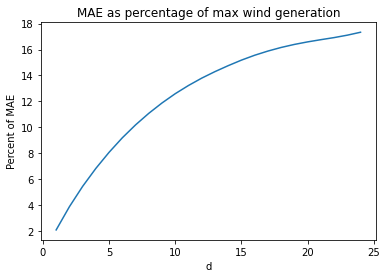

In [ ]:
#
percentage_max = []
for i in predict_mae_list:
  percentage_max.append(i/max_generation*100)

#set the name of x-axis
plt.xlabel("d")

#set the name of y-axis
plt.ylabel("Percent of MAE")

#set graph title
plt.title("MAE as percentage of max wind generation")

#plot the legend
plt.plot(np.linspace(1, 24, 24), percentage_max)

## Select optimal paramters for ARIMA model using AIC and BIC 

In [ ]:
#import the ARIMA function from the statsmodel library
#https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html
from statsmodels.tsa.arima_model import ARIMA

#start outer for loop for p variable
for i in range(1,5):
  
  #start inner for loop for q variable
  for j in range(1,5):
    
    #call the ARIMA function to build the model
    model = ARIMA(wind_df['Wind Generation'], order=(i, 1, j))

    #fit the model to our data
    model_fit = model.fit()

    #print the value of variable p
    print('p = ',i)

    #print the value of variable q
    print('q = ',j)
    
    #print the model summary
    print(model_fit.summary())

p =  1
q =  1
                             ARIMA Model Results                              
Dep. Variable:      D.Wind Generation   No. Observations:                 8759
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -49486.236
Method:                       css-mle   S.D. of innovations             68.771
Date:                Tue, 15 Feb 2022   AIC                          98980.472
Time:                        21:41:24   BIC                          99008.783
Sample:                             1   HQIC                         98990.118
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0557      2.282      0.024      0.981      -4.417       4.528
ar.L1.D.Wind Generation     0.6296      0.011     55.521      0.000       0.60